# INM363 Deep Inter-Active Refinement Network for Medical Image Segmentation

## Preprocessing

### Aaron Mir (Student Number: 160001207)

### https://github.com/Assassinsarms/XXX

In [1]:
import os
import cv2
import sys
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from nibabel.testing import data_path
# importing packages for visualisation and pre-processing
import SimpleITK as sitk
import time
import itk                 
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

## Initial Data Investigation

In [3]:
bratshgg_path = r"D:\AI MSc Large Modules\Masters_Project\CODE\Deep-Inter-Active-Refinement-Network-for-Medical-Image-Segmentation\data\MICCAI_BraTS_2018_Data_Training\HGG"
bratslgg_path = r"D:\AI MSc Large Modules\Masters_Project\CODE\Deep-Inter-Active-Refinement-Network-for-Medical-Image-Segmentation\data\MICCAI_BraTS_2018_Data_Training\LGG"

In [4]:
image_1 = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_flair.nii.gz') 
# accessing the first training image
image_1 = nib.load(image_1) 
# loading the training image

In [5]:
image_1.shape 
# looking at the shape (240x240 pixels), 155 frames, 4 dimensions (FLAIR, T1w, T1gd, T2w)

(240, 240, 155)

In [11]:
print(image_1) # looking at the header

<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b   

In [12]:
image_1_data = image_1.get_fdata()  
# transforming to np array - don't need to use np.asarray necessarily 

In [13]:
image_1_data.shape 
# looking at the shape

(240, 240, 155)

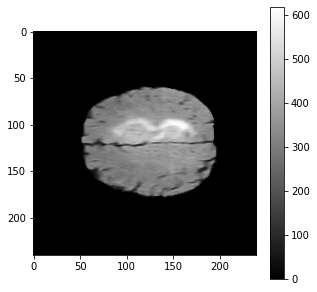

In [31]:
plt.figure(figsize=(5,5))
plt.imshow(image_1_data[:,:,108], cmap='gray') 
# plotting the FLAIR of the 108th frame of the 1st image
plt.colorbar();

### Initial investigation of the label for the first training image

In [16]:
image_1_label = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_seg.nii.gz') 
# accessing the label for the first training image
image_1_label = nib.load(image_1_label) 
# loading the label for the first training image

In [17]:
image_1_label.shape 
# investigating the shape (240x240 pixels), 155 frames each frame represents the pixels where the tumour is present as demonstrated below 

(240, 240, 155)

In [18]:
print(image_1_label) 
# looking at the header for the label

<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.  -0.  -0.  -0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b   

In [19]:
image_1_label_data = image_1_label.get_fdata() 
# transforming to np array - don't need to use np.asarray necessarily

In [20]:
image_1_label_data.shape 
# investigating the shape

(240, 240, 155)

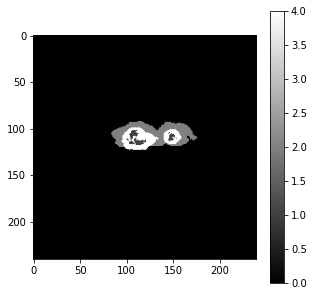

In [30]:
plt.figure(figsize=(5,5))
plt.imshow(image_1_label_data[:,:,108], cmap='gray') 
# plotting the label of the 1st training image - 55th frame shows clearly the tumour and 0-3 represents tumour class
plt.colorbar();

## 3D MRI Visualisation

In [6]:
image_1 = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_flair.nii.gz') 
# accessing the first training image
image_1 = nib.load(image_1) 
# loading the training image
image_1_data = image_1.get_fdata() 
# converting to np array

In [7]:
height, width, depth = image_1_data.shape         
# getting the dimensions
print(f'This image has the following dimensions: \nHeight = {height}\nWidth = {width}\nDepth = {depth}')

This image has the following dimensions: 
Height = 240
Width = 240
Depth = 155


In [8]:
# Function enabling interaction of all MRI layers
def visualisation(layer):                 
    plt.figure(figsize=(5,5))
    channel = 0
    plt.imshow(image_1_data[:,:, layer], cmap='gray')
    plt.title('Visualisation of Layers of Brain MRI', family='Arial', fontsize=20)
    plt.axis('off')
    return layer

interact(visualisation, layer = (0, image_1_data.shape[2]-1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [9]:
## Doing the same as above for the labels
image_1_label = os.path.join(bratshgg_path + '\Brats18_2013_2_1\Brats18_2013_2_1_seg.nii.gz') 
# accessing the label for the first training image
image_1_label = nib.load(image_1_label) 
# loading the label for the first training image
image_1_label_data = image_1_label.get_fdata()

In [10]:
height, width, depth = image_1_label_data.shape         
# getting the dimensions
print(f'This image has the following dimensions: \nHeight = {height}\nWidth = {width}\nDepth = {depth}.')
print(f'With the unique values: {np.unique(image_1_label_data)}.')
print('''Corresponding to the label categories:             
 0: for background,
 1: for non-enhancing tumour,
 2: for edema
 4: for enhancing tumour''')                            
 # outlining the labels

This image has the following dimensions: 
Height = 240
Width = 240
Depth = 155.
With the unique values: [0. 1. 2. 4.].
Corresponding to the label categories:             
 0: for background,
 1: for non-enhancing tumour,
 2: for edema
 4: for enhancing tumour


In [11]:
classes = {
    'Background' : 0.,
    'Non-enhancing Tumour' : 1.,
    'Edema' : 2.,
    'Enhancing Tumour' : 4.,
}
select_class = ToggleButtons(
    options = ['Background','Non-enhancing Tumour', 'Edema', 'Enhancing Tumour'],
    description = 'Select Class:',
    disabled = False,
    button_style = 'info', 
    
)
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes[seg_class]
    mask = np.where(image_1_label_data[:,:, layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');
# interactive jupyter widget to show different class labels
interactive(plot_image, seg_class = select_class, layer = select_layer) 
# remember the white space represents the class that is being shown

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Background', '…

## Viewing Data after Preprocessing

### Summary of steps performed:
- N4ITK bias correction 
- Normalise to zero mean and unit variance
- 1% of the top and bottom intensities removed 

In [2]:
img = np.load('data\\train\\img\\Brats18_2013_2_1_108.npy')

In [3]:
img.shape
# one .npy file contains 4 slices of flair, t1, t1ce and t2

(160, 160, 4)

Text(0.5, 1.0, 'N4 Bias Corrected, Normalised and Cropped FLAIR MRI slice')

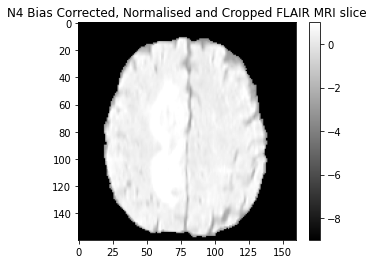

In [4]:
plt.imshow(img[:,:,0], cmap='gray') # 0 is flair, 1 is t1, 2 is t1ce, 3 is t2
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("N4 Bias Corrected, Normalised and Cropped FLAIR MRI slice")
#plt.savefig('ss.png')